In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

---

### Notes
(Les idées viennent d'une tuto Youtube)

<ins>Objectif</ins> :
- Comprendre du mieux possible nos données (un petit pas en avant vaut mieux qu'un grand pas en arriere)
- Développer une premiere stratégie de modélisation

<ins>Notes Random Général</ins> :
- ```sns.pairplot``` : les couleurs dans ```hue``` pour les clusters, c'est mieux qu'elles soient contrastées
- Après avoir créé les 10 clusters, on observe les stats pour chaque clusters dans la partie de l'histogramme (diagonale)

<ins>Tâches</ins> :
- Définir les potentiels objectifs

---

### Checklist de base

#### Objectifs :
- Qu'est-ce qu'on essaie de prouver avec ?

#### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 
- **types de variables** :
    - qualitatifs : 
    - quantitatifs : 
- **Analyse des valeurs manquantes** :
- **Notes random** :

#### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :

#### Analyse plus détaillée :
- **Relation Variables / Variables** :
- **NaN analyse** :

#### hypotheses nulle (H0) :
- Permet de voir si des analyses contiennent des changements significatifs

---

## Immo-data

### Objectifs :
- Retrouver les différents profils de personnes qui souhaite acheter un appartement
- Récupérer plus de données avec les filtres différents

In [4]:
file_path = 'data/immodataParis.csv'
data = pd.read_csv(file_path)

### Analyse de Forme :
- **variable target** : 
- **lignes et colonnes** : 1654 lignes et dans notre méthode de scrapping, on ne prend pas en compte les valeurs manquantes
- **types de variables** :
    - Décider quels opérations réaliser sur les deux types de variables
    - qualitatifs : 
        - Adresse
        - Ville
        - Arrondissement
        - Type
    - quantitatifs : 
        - Prix (€)
        - Prix mensuel (€)
        - Pièce(s)
        - Surface (m2)
        - Date de vente
- **Analyse des valeurs manquantes** :
    - Nous n'avons pas de valeur manquante, mais nous devons les redéfinir (par exemple, on n'aurait pas besoin de ville et de prix original)
- **Notes random** :
    - On a beaucoup de outliers qui empêchent de bien visualiser les graphes (On le voit bien avec sns.pairplot). Solution : ?
    - Par exemple, je pense pas qu'on va garder les appartements à plus de 200 m² (en vrai pourquoi pas, mais y a trop peu de données dessus)
    - Ou alors avec quelques lignes de code et sklearn, détecter automatiquement les outliers et faire du pré-processing après ça.

#### Visualisation

In [5]:
df = data.copy()
df.shape
df.dtypes.value_counts() # Différentes types de données des colonnes

int64     5
object    4
dtype: int64

In [6]:
df.head()

,Adresse,Ville,Arrondissement,Type,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2),Date de vente
0,270 RUE SAINT-HONORÉ,PARIS,75001,Appartement,750400,14431,2,52,22/05/2023
1,186 RUE DE RIVOLI,PARIS,75001,Appartement,330000,14348,1,23,28/04/2023
2,23 RUE DE RICHELIEU,PARIS,75001,Appartement,360100,15657,1,23,29/03/2023
3,27 RUE DE RICHELIEU,PARIS,75001,Appartement,286123,11005,1,26,10/02/2023
4,272 RUE SAINT-HONORÉ,PARIS,75001,Appartement,411636,12864,2,32,28/12/2022


In [7]:
df.columns

Index(['Adresse', 'Ville', 'Arrondissement', 'Type', 'Prix (€)',
       'Prix mensuel (€)', 'Pièce(s)', 'Surface (m2)', 'Date de vente'],
      dtype='object')

- **Adresse** : Valeur non unique (mais pas besoin pour les analyses)
- **Ville** : Même valeur (à retirer)
- **Arrondissement** : A regouper ?
- **Type** : A regrouper (beaucoup plus d'appartements que le reste... -> Récupérer plus de données pour les autres types)
- **Prix (€)** : A retirer ?
- **Prix mensuel (€)** : Pour la prédiction
- **Pièce(s)** : Sort
- **Surface (m2)** : Sort
- **Date de vente** : Il faut qu'on créer des analyses avec les dates (c'est possible)

#### Statistiques et Filtres

In [8]:
# Counting

df['Ville'].value_counts()

PARIS    1654
Name: Ville, dtype: int64

In [9]:
# Sorting

df.sort_values('Surface (m2)')

,Adresse,Ville,Arrondissement,Type,Prix (€),Prix mensuel (€),Pièce(s),Surface (m2),Date de vente
762,142 RUE DU FAUBOURG SAINT-DENIS,PARIS,75010,Appartement,20000,6667,1,3,27/01/2022
687,46 RUE LAMARTINE,PARIS,75009,Appartement,19000,3800,1,5,01/04/2021
664,17 RUE DE CHÂTEAUDUN,PARIS,75009,Appartement,40000,8000,1,5,27/10/2021
552,2 RUE MALEVILLE,PARIS,75008,Appartement,60000,10000,1,6,23/05/2023
206,3 RUE PAUL DUBOIS,PARIS,75003,Appartement,105000,17500,1,6,06/11/2018
...,...,...,...,...,...,...,...,...,...
1232,77 AVENUE HENRI MARTIN,PARIS,75016,Appartement,2090000,6147,7,340,14/01/2023
1210,77 AVENUE HENRI MARTIN,PARIS,75016,Appartement,5271700,15505,7,340,26/06/2023
1283,87 AVENUE HENRI MARTIN,PARIS,75016,Appartement,5228950,13072,9,400,17/11/2021
362,151B RUE SAINT-JACQUES,PARIS,75005,Maison,19346000,43377,13,446,15/03/2021


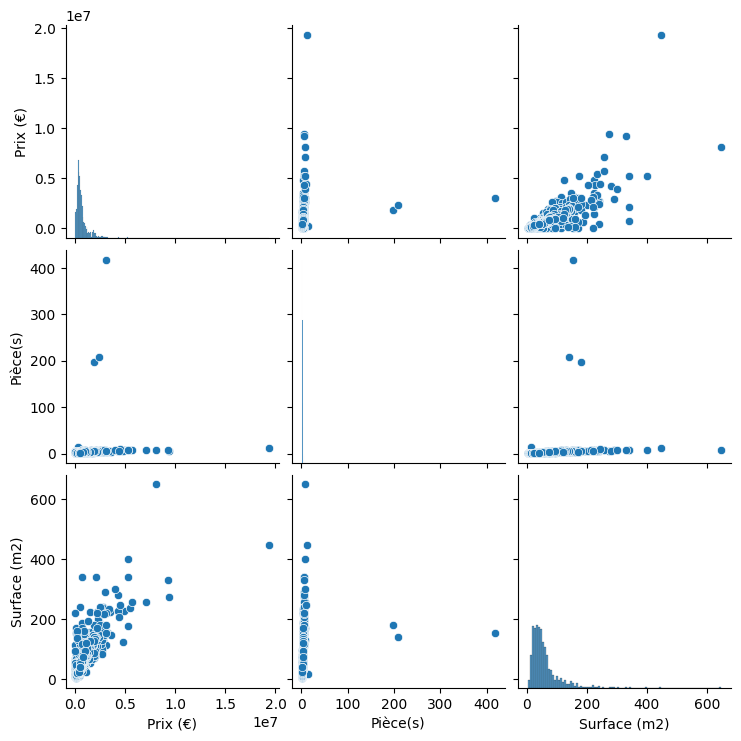

In [10]:
# Pour une meilleure visualisation, peut-être mettre de la couleur
# en fonction des labels correspondant à des clusters différents

sns.pairplot(df[['Prix (€)', 'Pièce(s)', 'Surface (m2)']])

In [11]:
# Clustering 
# Transformation Données > Normalisation > Clustering 
# (ce serait mieux que de directement faire du Clustering, le faire
# dans la partie Modelling)
# Dans la partie 'Modelling', il faudra ajuster le nombre de clusters
# Peut-être en utilisant GridSearchCV

from sklearn.cluster import AgglomerativeClustering

new_df = df[["Prix (€)","Pièce(s)","Surface (m2)"]]
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster_labels = clustering.fit_predict(new_df)
new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns

C:\Users\sunse\AppData\Local\Temp\ipykernel_70368\248202620.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns


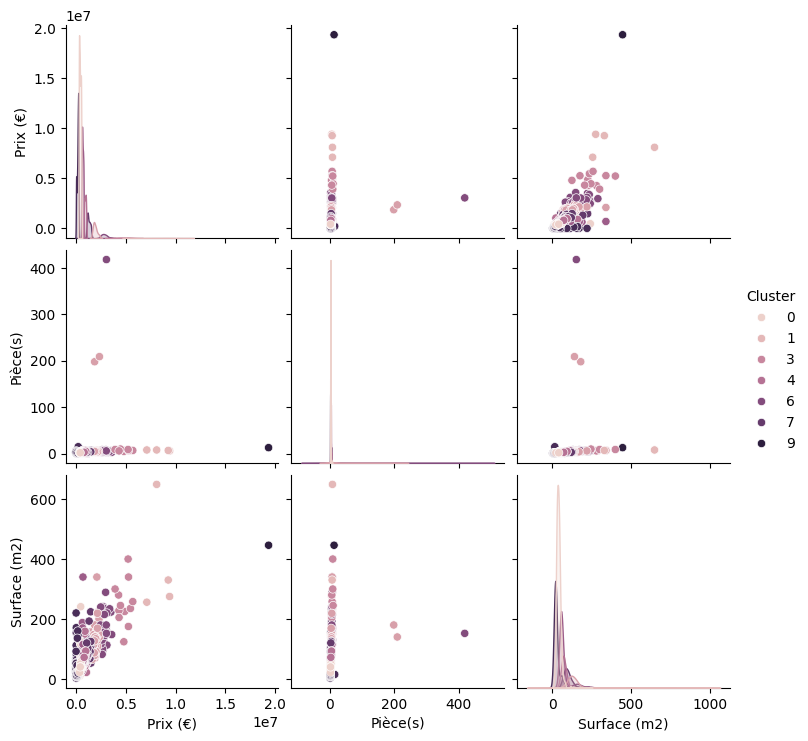

In [12]:
sns.pairplot(new_df, hue='Cluster')

### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :


### Analyse plus détaillée :
- **Relation Variables / Variables** :
- **NaN analyse** :

### hypotheses nulle (H0) :
- Permet de voir si des analyses contiennent des changements significatifs

---

## housedata

### Objectifs :

In [13]:
file_path = 'data/housedata.csv'
data = pd.read_csv(file_path)

### Analyse de Forme :
- **variable target** :
- **lignes et colonnes** :
- **types de variables** :
- **Analyse de valeurs manquantes** :
- **Notes random** :

#### Visualisation

In [14]:
df = data.copy()
df.shape
df.dtypes.value_counts() # Différentes types de données des colonnes

int64      9
object     5
float64    4
dtype: int64

In [15]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [16]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country'],
      dtype='object')

- **date** : 
- **price** : 
- **bedrooms** : 
- **bathrooms** : 
- **sqft_living** : 
- **sqft_lot** : 
- **floors** : 
- **waterfront** : 
- **view** : 
- **condition** : 
- **sqft_above**, : 
- **sqft_basement** : 
- **yr_built** : 
- **yr_renovated** : 
- **street** : 
- **city** : 
- **statezip** : 
- **country** : 

### Statistiques et Filtres

In [18]:
# Counting

df['condition'].value_counts()

3    2875
4    1252
5     435
2      32
1       6
Name: condition, dtype: int64

In [19]:
# Sorting

df.sort_values('sqft_living')

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
3778,2014-07-01 00:00:00,276000.0,1.0,0.75,370,1801,1.0,0,0,5,370,0,1923,0,2508 NW 67th St,Seattle,WA 98117,USA
2919,2014-06-20 00:00:00,245000.0,1.0,0.75,380,15000,1.0,0,0,3,380,0,1963,2008,13602 8th Ave S,Burien,WA 98168,USA
2416,2014-06-12 00:00:00,280000.0,1.0,0.75,420,6720,1.0,0,0,3,420,0,1922,2008,5550 17th Ave S,Seattle,WA 98108,USA
1219,2014-05-23 00:00:00,80000.0,1.0,0.75,430,5050,1.0,0,0,2,430,0,1912,0,32215 E Rutherford St,Carnation,WA 98014,USA
4184,2014-07-09 00:00:00,150000.0,3.0,0.75,490,38500,1.5,0,0,4,490,0,1959,0,11881 Tye River Rd NE,Skykomish,WA 98288,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4575,2014-07-02 00:00:00,0.0,5.0,6.25,8020,21738,2.0,0,0,3,8020,0,2001,0,2 Crescent Key,Bellevue,WA 98006,USA
2328,2014-06-11 00:00:00,2888000.0,5.0,6.25,8670,64033,2.0,0,4,3,6120,2550,1965,2003,1291 NW Elford Dr,Seattle,WA 98177,USA
2654,2014-06-17 00:00:00,4668000.0,5.0,6.75,9640,13068,1.0,1,4,3,4820,4820,1983,2009,5044 Butterworth Rd,Mercer Island,WA 98040,USA
2286,2014-06-11 00:00:00,7062500.0,5.0,4.50,10040,37325,2.0,1,2,3,7680,2360,1940,2001,4442 95th Ave NE,Bellevue,WA 98004,USA


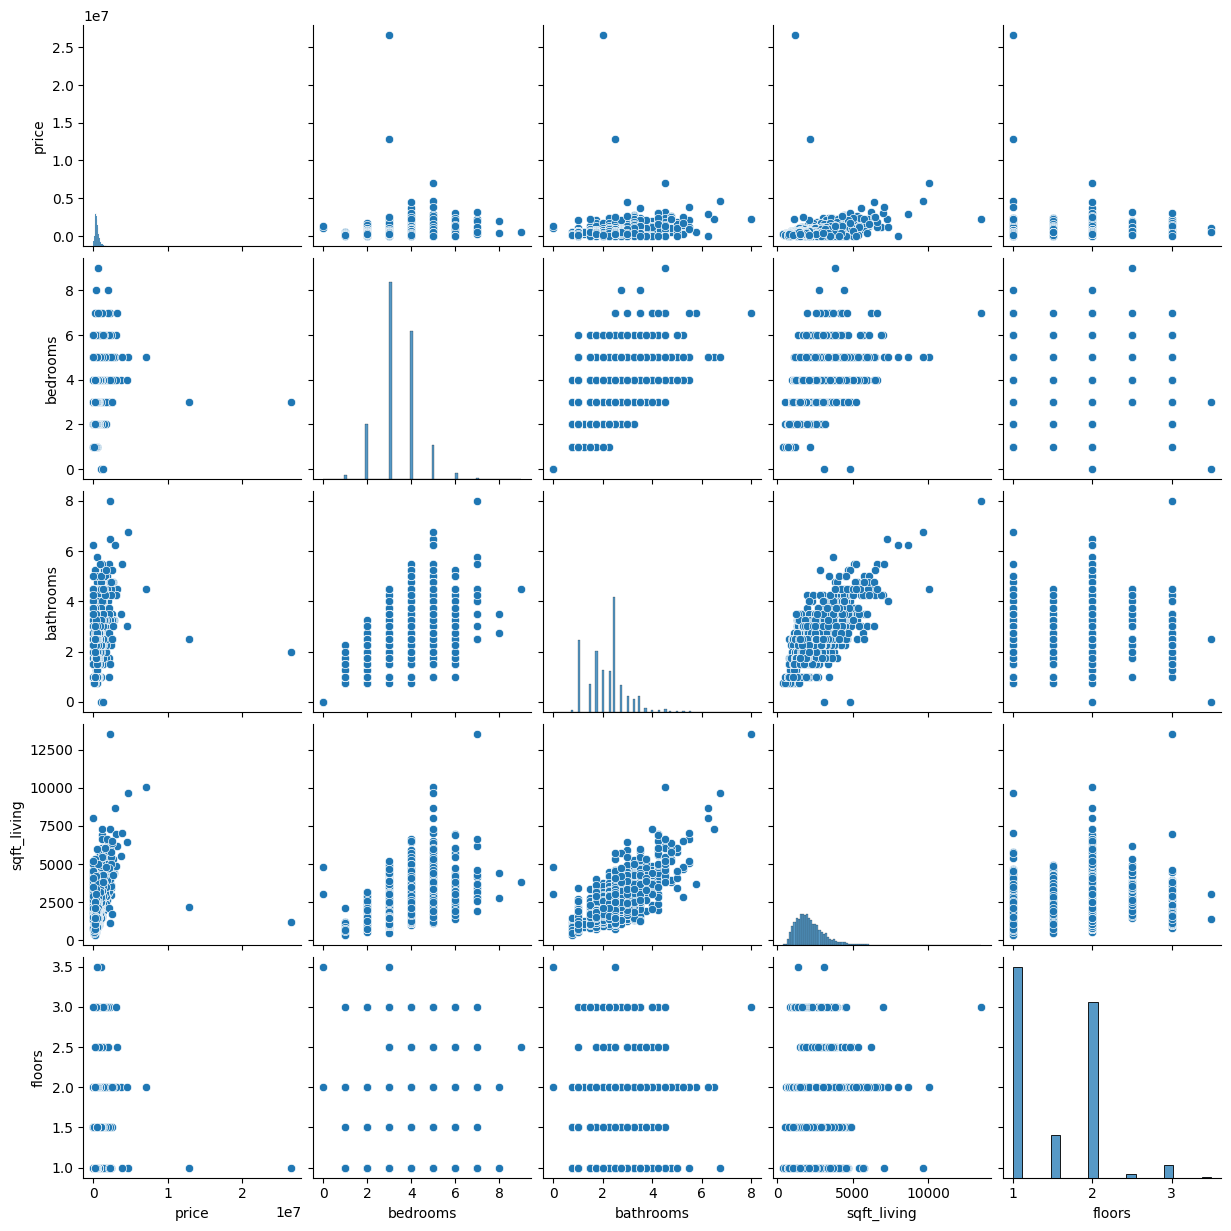

In [20]:
# Pour une meilleure visualisation, peut-être mettre de la couleur
# en fonction des labels correspondant à des clusters différents

sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living','floors']])

In [21]:
# Clustering 
# Transformation Données > Normalisation > Clustering 
# (ce serait mieux que de directement faire du Clustering, le faire
# dans la partie Modelling)
# Dans la partie 'Modelling', il faudra ajuster le nombre de clusters
# Peut-être en utilisant GridSearchCV

from sklearn.cluster import AgglomerativeClustering

new_df = df[['price', 'bedrooms', 'bathrooms', 'sqft_living','floors']]
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster_labels = clustering.fit_predict(new_df)
new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns

C:\Users\sunse\AppData\Local\Temp\ipykernel_70368\1229608324.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns


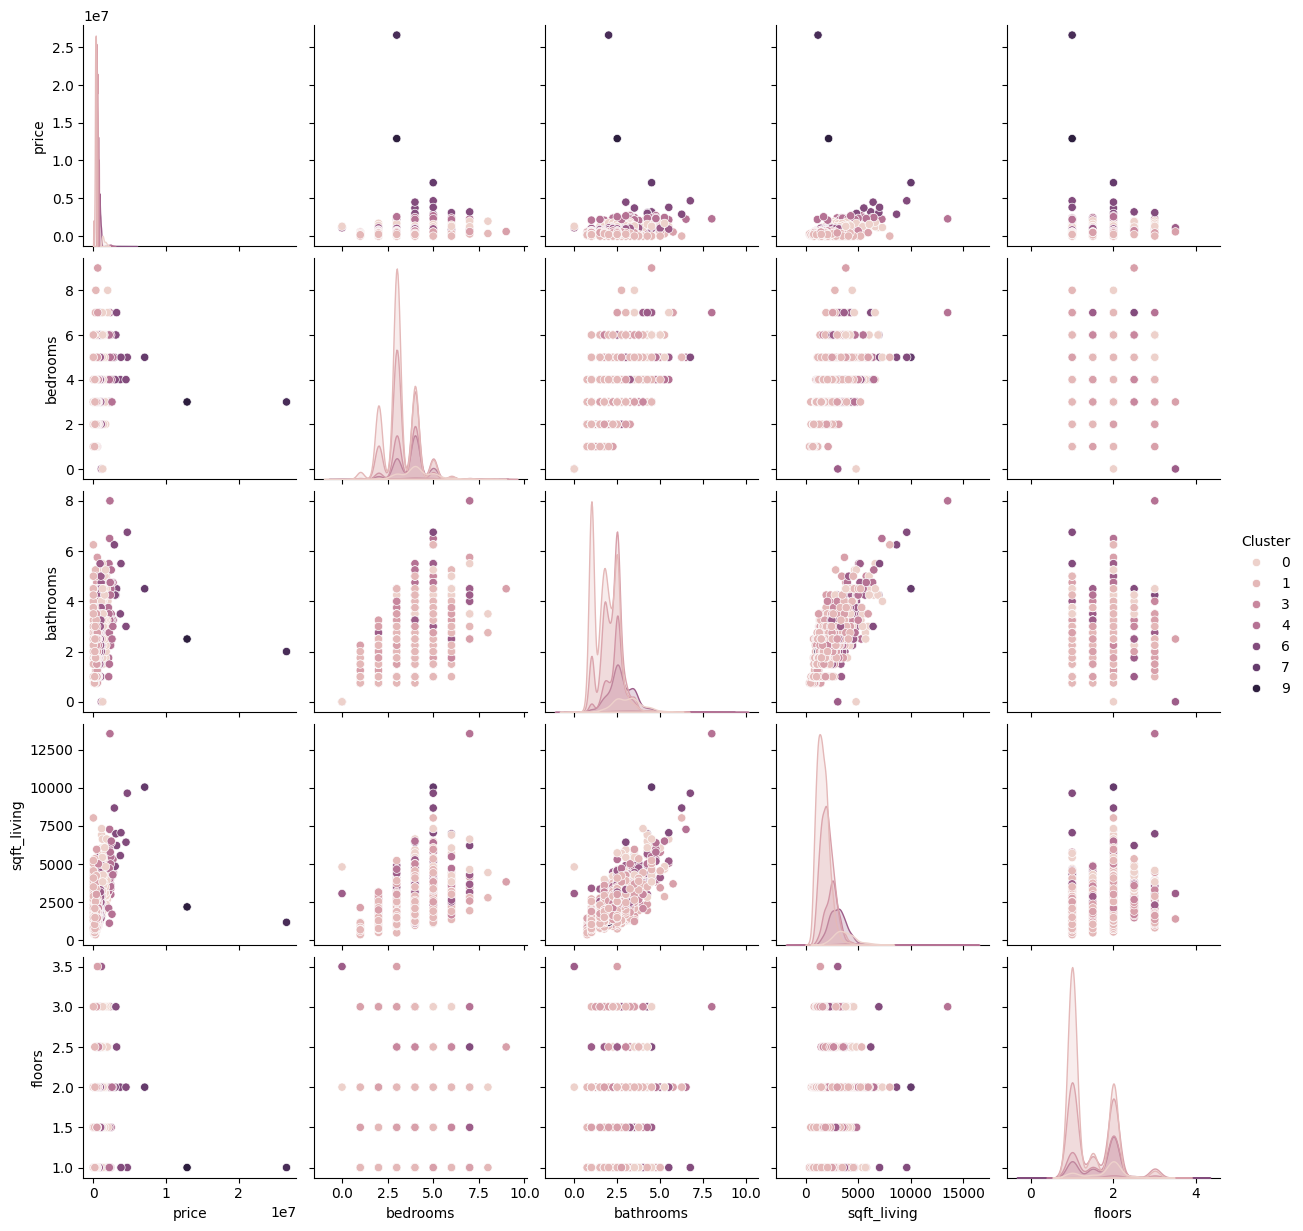

In [22]:
sns.pairplot(new_df, hue='Cluster')

### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :

### Analyse plus détaillée :
- **Relation Variables / Variables** :
- **NaN analyse** :

### hypotheses nulle (H0) :
- Permet de voir si des analyses contiennent des changements significatifs

---

## Century21

### Objectifs :

In [24]:
file_path = 'data/century21Paris.csv'
data = pd.read_csv(file_path)

### Analyse de Forme :
- **variable target** :
- **lignes et colonnes** :
- **types de variables** :
- **Analyse de valeurs manquantes** :
- **Notes random** :

#### Visualisation

In [25]:
df = data.copy()
df.shape
df.dtypes.value_counts() # Différentes types de données des colonnes

object     2
int64      2
float64    1
dtype: int64

In [26]:
df.head()

,Ville,Arrondissement,Surface (m2),Pièce(s),Prix (€)
0,PARIS,75008,9.00,1,536
1,PARIS,75019,49.70,2,1446
2,PARIS,75016,42.87,1,1480
3,PARIS,75013,84.30,4,2550
4,PARIS,75015,45.28,2,1650


In [27]:
df.columns

Index(['Ville', 'Arrondissement', 'Surface (m2)', 'Pièce(s)', 'Prix (€)'], dtype='object')

- **Ville** : Même valeur (à retirer)
- **Arrondissement** : A regouper ?
- **Surface (m2)** : Sort
- **Pièce(s)** : Sort
- **Prix (€)** : Pour la prédiction de prix

#### Statistiques et Filtres

In [28]:
# Counting

df['Ville'].value_counts()

PARIS    71
Name: Ville, dtype: int64

In [29]:
# Sorting

df.sort_values('Surface (m2)')

,Ville,Arrondissement,Surface (m2),Pièce(s),Prix (€)
0,PARIS,75008,9.00,1,536
21,PARIS,75018,10.10,1,385
30,PARIS,75010,10.53,1,650
60,PARIS,75016,14.67,1,700
10,PARIS,75016,19.31,1,950
...,...,...,...,...,...
6,PARIS,75015,100.69,4,2450
66,PARIS,75016,113.54,4,4500
17,PARIS,75016,193.46,6,6373
70,PARIS,75006,252.40,12,15720


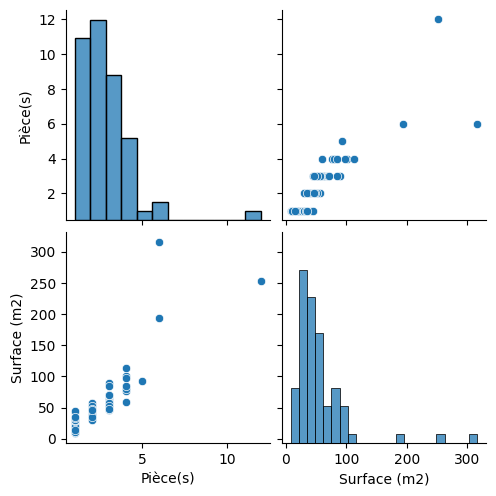

In [30]:
# Pour une meilleure visualisation, peut-être mettre de la couleur
# en fonction des labels correspondant à des clusters différents

sns.pairplot(df[['Prix (€)', 'Pièce(s)', 'Surface (m2)']])

In [31]:
# Clustering 
# Transformation Données > Normalisation > Clustering 
# (ce serait mieux que de directement faire du Clustering, le faire
# dans la partie Modelling)
# Dans la partie 'Modelling', il faudra ajuster le nombre de clusters
# Peut-être en utilisant GridSearchCV

from sklearn.cluster import AgglomerativeClustering

new_df = df[["Prix (€)","Pièce(s)","Surface (m2)"]]
clustering = AgglomerativeClustering(n_clusters=10, linkage='ward')
cluster_labels = clustering.fit_predict(new_df)
new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns

C:\Users\sunse\AppData\Local\Temp\ipykernel_70368\248202620.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['Cluster'] = cluster_labels # C'est pour voir les différents cluster avec sns


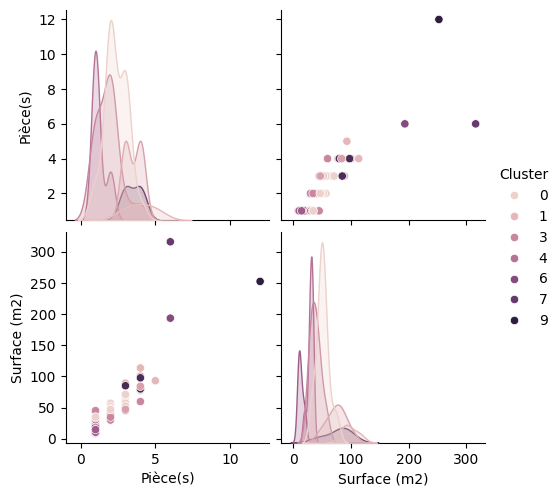

In [32]:
sns.pairplot(new_df, hue='Cluster')

### Analyse de Fond :
- **Visualisation de la target** :
- **Signification des variables** :
- **Relation Variables / Target** :

### Analyse plus détaillée :
- **Relation Variables / Variables** :
- **NaN analyse** :

### hypotheses nulle (H0) :
- Permet de voir si des analyses contiennent des changements significatifs